In [1]:
import numpy as np
import pandas as pd

In [2]:
from __future__ import absolute_import, division, print_function

import os

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

print(tf.VERSION)
print(tf.keras.__version__)

1.13.1
2.2.4-tf


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_json("recipesGerman.json")

In [6]:
df

,Day,Ingredients,Instructions,Month,Name,Url,Weekday,Year
0,1,"[600 g Hackfleisch, halb und halb, 800 g Sauer...",Die Eier hart kochen. Dann pellen und mit eine...,January,Gebratener Hasenrücken,https://www.chefkoch.de/rezepte/185441079701305/,Thursday,2009
1,1,"[1 kg Strauchtomate(n), 1 Gemüsezwiebel(n), 1 ...",Vorab folgende Bemerkung: Alle Mengen sind Cir...,July,Pilz Stroganoff,https://www.chefkoch.de/rezepte/2718181424631245/,Saturday,2017
2,1,"[1 Glas Kirsche(n), 1 Pck. Vanillepuddingpulve...","Die Kirschen abtropfen lassen, dabei den Saft ...",January,Kaninchen a la Gioff,https://www.chefkoch.de/rezepte/46341015661368/,Monday,2007
3,1,"[500 g Spargel, grüner, 300 ml Brühe oder Fond...","Den Spargel säubern, die holzigen Enden abschn...",April,Spanisches Knoblauch-Kaninchen,https://www.chefkoch.de/rezepte/51051018014178/,Monday,2013
4,1,"[250 g Kohlrabi, 150 ml Gemüsebrühe, 150 ml Mi...",Kohlrabi schälen und klein würfeln. Mit der Br...,August,Gnocchi - Hack - Pfanne mit Basilikum,https://www.chefkoch.de/rezepte/1555771262860408/,Tuesday,2017
5,1,"[Für den Mürbeteig:, 200 g Weizenmehl, 100 g B...","Aus dem Mehl, der Butter, dem Ei und etwas Sal...",August,Spaghetti Siracusani,https://www.chefkoch.de/rezepte/318661113606205/,Monday,2011
6,1,"[Für die Marinade:, 3 EL Öl, 5 EL Rotwein, 2 E...","Das Öl mit dem Rotwein, dem Essig, den Wachold...",October,Rehrücken in Salzkruste mit Waldpilzgulasch,https://www.chefkoch.de/rezepte/307991111110164/,Sunday,2006
7,1,"[1 Tasse Reis, (Langkornreis), 2 Tasse/n Wasse...",Den Reis mit 2 Tassen Wasser/Gemüsebrühe aufse...,March,Eier in Senfsauce,https://www.chefkoch.de/rezepte/800291183649658/,Thursday,2012
8,1,"[1200 g Kartoffel(n), mehlig kochend, 250 ml M...","Kartoffeln schälen, waschen, vierteln und in k...",April,Äppelufflaaf mett Woi,https://www.chefkoch.de/rezepte/295691108953224/,Saturday,2006
9,1,"[400 g Kartoffel(n), 300 g Steckrübe(n), 300 g...","Kartoffeln, Steckrüben, Sellerie und Zwiebel s...",November,Gefüllte Schinkenröllchen,https://www.chefkoch.de/rezepte/44381015086527/,Wednesday,2006


## Separamos en el dataframe

In [57]:
eval_df = df[11000:]
eval_df.shape

(1190, 8)

In [65]:
df = df[:11000]
df.shape

(11000, 8)

# Tokenizar con Spacy

In [9]:
!python -m spacy download de_core_news_sm

    100% |████████████████████████████████| 38.2MB 1.1MB/s ta 0:00:01
  Running setup.py install for de-core-news-sm ... done

    Linking successful
    /LUSTRE/home/jurias/miniconda3/lib/python3.7/site-packages/de_core_news_sm
    -->
    /LUSTRE/home/jurias/miniconda3/lib/python3.7/site-packages/spacy/data/de_core_news_sm

    You can now load the model via spacy.load('de_core_news_sm')



In [10]:
import spacy
nlp = spacy.load('de_core_news_sm', disable=['parser', 'tagger', 'ner'])

In [11]:
tokenized = [nlp(t) for t in df.Instructions.values]

In [12]:
tokenized[0]

Die Eier hart kochen. Dann pellen und mit einem Eierschneider in Scheiben schneiden. Den Reis halbgar kochen und zur Seite stellen. Die Wurst (Kolbász) in dünne Scheiben schneiden.Den Knoblauch abziehen und fein würfeln. Die Zwiebel schälen, fein hacken und in etwas Fett glasig braten. Knoblauch und Hackfleisch dazu geben und so lange braten, bis das Hackfleisch schön krümelig wird. Den eigenen Saft nicht ganz verkochen lassen. Die Fleischmasse mit Salz, Pfeffer und Paprikapulver würzen.Das Sauerkraut kurz durchspülen, ausdrücken und abtropfen lassen (damit es nicht zu sauer wird). Das Sauerkraut in einen Topf geben und mit dem Kümmel und den Lorbeerblättern vermischen. Ca. 30 Minuten unter Zugabe von wenig Wasser bei niedriger Stufe dünsten.Eine feuerfeste Form mit etwas Öl einfetten und den Boden dünn mit Sauerkraut belegen. Darauf Kolbász und die Hälfte der in Scheiben geschnittene Eier verteilen, dann eine weitere dünne Schicht Sauerkraut drüber legen. Mit 1 Becher Schmand bedecken

### Construimos el vocabulario

In [13]:
vocab = {"<UNK>": 1, "<PAD>": 0}
for txt in tokenized:
    for token in txt:
        if token.text not in vocab.keys():
            vocab[token.text] = len(vocab)
print("Number of unique tokens: {}".format(len(vocab)))

Number of unique tokens: 17968


# Crear las etiquetas

#### Nuestros datos no estan etiquetados pero podemos obtenerlos de la estructura.

In [14]:
ingredients = df.Ingredients

In [15]:
ingredients[0]

['600 g Hackfleisch, halb und halb',
 '800 g Sauerkraut',
 '200 g Wurst, geräucherte (Csabai Kolbász)',
 '150 g Speck, durchwachsener, geräucherter',
 '100 g Reis',
 '1 m.-große Zwiebel(n)',
 '1 Zehe/n Knoblauch',
 '2 Becher Schmand',
 '1/2TL Kümmel, ganzer',
 '2 Lorbeerblätter',
 'Salz und Pfeffer',
 '4 Ei(er) (bei Bedarf)',
 'Paprikapulver',
 'etwas Wasser',
 'Öl']

#### Primero limpiamos la lista de ingredientes de numeros, stop words y otras cosas

In [16]:
def _filter(token):
    if len(token) < 2:
        return False
    if token.is_stop:
        return False
    if token.is_digit:
        return False
    if token.like_num:
        return False
    if token.text[0].islower():
        return False
    return True

In [17]:
def _clean(text):
    text = text.replace("(", "")
    text = text.split("/")[0]
    return text

#### Por ejemplo

In [18]:
clean = [_clean(t.text) for i in ingredients[0] for t in nlp(i) if _filter(t) and len(_clean(t.text)) >= 2]
clean

['Hackfleisch',
 'Sauerkraut',
 'Wurst',
 'Csabai',
 'Kolbász',
 'Speck',
 'Reis',
 'Zwiebeln',
 'Zehe',
 'Knoblauch',
 'Becher',
 'Schmand',
 'Kümmel',
 'Lorbeerblätter',
 'Salz',
 'Pfeffer',
 'Eier',
 'Bedarf',
 'Paprikapulver',
 'Wasser',
 'Öl']

In [19]:
def get_labels(ingredients, tokenized_instructions):
    labels = []
    for ing, ti in zip(ingredients, tokenized_instructions):
        l_i = []
        ci = [_clean(t.text) for i in ing for t in nlp(i) if _filter(t) and len(_clean(t.text)) >= 2]
        label = []
        for token in ti:
            l_i.append(any((c == token.text or c == token.text[:-1] or c[:-1] == token.text) for c in ci))
        labels.append(l_i)
    return labels

In [20]:
labels = get_labels(ingredients, tokenized)

In [21]:
set([t.text for t, l in zip(tokenized[0], labels[0]) if l])

{'Becher',
 'Eier',
 'Hackfleisch',
 'Knoblauch',
 'Kolbász',
 'Kümmel',
 'Lorbeerblättern',
 'Paprikapulver',
 'Pfeffer',
 'Reis',
 'Salz',
 'Sauerkraut',
 'Schmand',
 'Speck',
 'Wasser',
 'Wurst',
 'Zwiebel',
 'Öl'}

## Modelos con redes LSTM

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

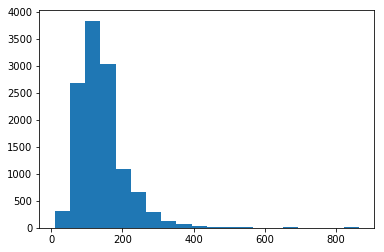

In [23]:
plt.hist([len([t for t in tokens]) for tokens in tokenized], bins=20);

In [24]:
MAX_LEN = 400

In [25]:
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [26]:
def prepare_sequences(texts, max_len, vocab={"<UNK>": 1, "<PAD>": 0}):
    X = [[vocab.get(w.text, vocab["<UNK>"]) for w in s] for s in texts]
    return pad_sequences(maxlen=max_len, sequences=X, padding="post", value=vocab["<PAD>"])

In [27]:
X_seq = prepare_sequences(tokenized, max_len=MAX_LEN, vocab=vocab)

In [28]:
X_seq[1]

array([192, 193, 194, 183, 195, 196, 128, 197,   9, 198, 199, 200, 201,
       202, 203,  60, 204, 205,   9,  13, 206,  15,  23,  98, 207, 208,
        51, 209,  68, 202, 203,  25,   6, 195, 125, 202, 210, 211, 212,
        33,  45, 213, 214, 100, 196,  13, 215, 216, 217,  33,   9,  68,
       218, 219, 213, 169,  35,  82, 100, 220, 221, 202,   6, 222,  45,
       223,  48, 224,  33,  67, 225, 100, 226,   6, 227, 228, 229, 130,
        45,  92,  85, 230, 211, 231,   6, 232, 233, 234, 235, 145, 157,
       236,   9, 237, 238, 104, 239, 210, 240, 157, 241,  54,   6, 109,
       242, 243, 244, 245, 246, 187, 247,   6, 248, 183, 249, 250,  33,
       129,  13, 251, 252, 101, 253,  33, 254,   9,  31, 255,  40, 172,
         6,   2, 256, 257, 177, 258, 259, 260,  33,  42, 261, 262, 263,
       131, 264, 265, 266,  33, 267,  74, 268, 269,  68, 270,   6,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [29]:
y_seq = []
for l in labels:
    y_i = []
    for i in range(MAX_LEN):
        try:
            y_i.append(float(l[i]))
        except:
            y_i.append(0.0)
    y_seq.append(np.array(y_i))
y_seq = np.array(y_seq)
y_seq = y_seq.reshape(y_seq.shape[0], y_seq.shape[1], 1)

# Preparando la red

## Para empezar una red sencilla de 2 capas

In [30]:
def create_model():
    model = tf.keras.Sequential()
    model.add(layers.Embedding(input_dim=len(vocab), mask_zero=True, output_dim=50))
    model.add(layers.SpatialDropout1D(0.2))
    model.add(layers.Bidirectional(layers.LSTM(units=64, return_sequences=True)))
    model.add(layers.SpatialDropout1D(0.2))
    model.add(layers.Bidirectional(layers.LSTM(units=64, return_sequences=True)))
    model.add(layers.TimeDistributed(layers.Dense(1, activation='sigmoid')))
    
    model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [31]:
model = create_model()

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 50)          898400    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 50)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         58880     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, None, 128)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
time_distributed (Tim

In [32]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback1 = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)


In [33]:
history = model.fit(X_seq, y_seq, epochs=10, batch_size=256, validation_split=0.1, callbacks = [cp_callback1])

Train on 10971 samples, validate on 1219 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
10752/10971 [============================>.] - ETA: 8s - loss: 0.3806 - acc: 0.8964 
Epoch 00001: saving model to training_1/cp.ckpt
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.
10971/10971 [==============================] - 444s 40ms/sample - loss: 0.3787 - acc: 0.8968 - val_loss: 0.2923 - val_acc: 0.9109
Epoch 2/10
10752/10971 [============================>.] - ETA: 8s - loss: 0.2752 - acc: 0.9103 
Epoch 00002: saving model to training_1/cp.ckpt
10971/10971 [==============================] - 436s 40ms/sample - loss: 0.2749 - acc: 0.9103 - val_loss: 0.2509 - val_acc: 0.9109
Epoch 3/10
10752/10971 [============================>.] - ETA: 8s - loss: 0.2099 - acc: 0.9163 
Epoch 00003: saving model to training_1/cp.ckpt
10971/10971 [==============================] - 437s 40ms/sample - loss: 0.2084 -

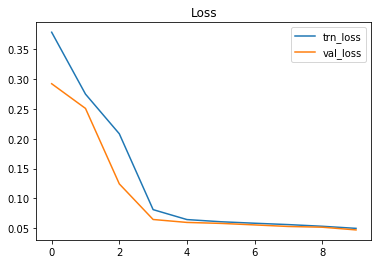

In [34]:
plt.plot(history.history["loss"], label="trn_loss");
plt.plot(history.history["val_loss"], label="val_loss");
plt.legend();
plt.title("Loss");

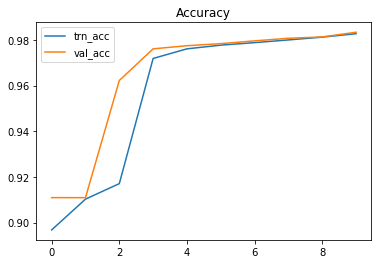

In [35]:
plt.plot(history.history["acc"], label="trn_acc");
plt.plot(history.history["val_acc"], label="val_acc");
plt.legend();
plt.title("Accuracy");

# Analisis de la prediccion del modelo

In [36]:
y_pred = model.predict(X_seq, verbose=1, batch_size=1024)

12190/12190 [==============================] - 81s 7ms/sample


In [37]:
i = 3343
pred_i = y_pred[i] > 0.05

In [38]:
tokenized[i]

Kohlrabi schälen, waschen und in Stifte schneiden. Brühe und Milch ankochen, Kohlrabi dazugeben, aufkochen lassen und 10 Minuten kochen. Dann herausnehmen und abtropfen lassen, die Brühe aufheben.Butter erhitzen, das Mehl darin anschwitzen, mit Kohlrabibrühe ablöschen und aufkochen lassen. Mit den Gewürzen abschmecken. Kohlrabi wieder dazugeben.Hähnchenbrust schnetzeln, kräftig anbraten und würzen. Das Fleisch in eine Auflaufform geben, die Speckwürfel darüber verteilen. Mit Käse bestreuen. Nun das Gemüse darüber schichten und alles bei 180 °C ca. 25 Minuten überbacken.Tipp:Man kann auch gut gekochte, in Würfel geschnittene Kartoffeln unter die Kohlrabi mischen. Ebenso kann man auch Kohlrabi und Möhren für den Auflauf nehmen. Schmeckt auch sehr lecker!

In [39]:
ingreds = [t.text for t, p in zip(tokenized[i], pred_i) if p]
print(set(ingreds))

{'Milch', 'Kartoffeln', 'Brühe', 'Möhren', 'Käse', 'Kohlrabi', 'Speckwürfel', 'Butter', 'Gemüse', 'Mehl'}


In [40]:
ingreds = [t.text for t, p in zip(tokenized[i], y_seq[i]) if p]
set(ingreds)

{'Butter', 'Kohlrabi', 'Käse', 'Mehl', 'Milch'}

In [47]:
ingredients[i]

['500 g Kohlrabi',
 '1/4Liter Hühnerbrühe',
 '1/4Liter Milch',
 '1 EL Butter',
 '30 g Mehl',
 '300 g Hähnchenbrustfilet(s)',
 'Salz und Pfeffer',
 'Muskat',
 '50 g Käse, gerieben',
 '50 g Speck, gewürfelt']

## Se ve bien. El modelo parece ser mejor que las etiquetas de entrenamiento. Ahora usaremos nuestras etiquetas para hacer el fine-tuning

In [41]:
new_labels = []
for pred_i, ti in zip(y_pred, tokenized):
    l_i = []
    ci = [t.text for t, p in zip(tokenized[i], pred_i > 0.05) if p]
    label = []
    for token in ti:
        l_i.append(any((c == token.text or c == token.text[:-1] or c[:-1] == token.text) for c in ci))
    new_labels.append(l_i)

In [42]:
y_seq_new = []
for l in new_labels:
    y_i = []
    for i in range(MAX_LEN):
        try:
            y_i.append(float(l[i]))
        except:
            y_i.append(0.0)
    y_seq_new.append(np.array(y_i))
y_seq_new = np.array(y_seq_new)
y_seq_new = y_seq.reshape(y_seq_new.shape[0], y_seq_new.shape[1], 1)

In [43]:
checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback2 = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)


In [44]:
history = model.fit(X_seq, y_seq_new, epochs=1, batch_size=256, validation_split=0.1, callbacks = [cp_callback2])

Train on 10971 samples, validate on 1219 samples
10752/10971 [============================>.] - ETA: 8s - loss: 0.0470 - acc: 0.9839 
Epoch 00001: saving model to training_2/cp.ckpt
10971/10971 [==============================] - 438s 40ms/sample - loss: 0.0469 - acc: 0.9839 - val_loss: 0.0450 - val_acc: 0.9844


# Miremos los datos de prueba

In [58]:
eval_ingredients = eval_df.Ingredients.values

In [59]:
eval_tokenized = [nlp(t) for t in eval_df.Instructions.values]

X_seq_test = prepare_sequences(eval_tokenized, max_len=MAX_LEN, vocab=vocab)

In [61]:
y_pred_test = model.predict(X_seq_test, verbose=1, batch_size=1024)

1190/1190 [==============================] - 9s 8ms/sample


In [62]:
i = 893
pred_i = y_pred_test[i] > 0.05
print(eval_tokenized[i])
print()
print(eval_ingredients[i])
print()
ingreds = [t.text for t, p in zip(eval_tokenized[i], pred_i) if p]
print(set(ingreds))

Den Quark durch ein Sieb in eine tiefe Schüssel streichen.Das Mehl, den Zucker, Salz, Vanillezucker und das rohe Ei/er gut verrühren.Diese Masse auf einem mit Mehl bestreuten Backbrett zu einer dicken Wurst rollen und in 10 gleichgroße Scheiben schneiden. In heißer Butter von beiden Seiten goldbraun braten.Die fertigen Tworoshniki werden mit Puderzucker bestreut oder warm mit saurer Sahne oder Obstsirup zu Tisch gebracht.

['500 g Quark, sehr trockenen', '80 g Mehl', '2 EL Zucker', '1 Pck. Vanillezucker', 'Salz', '1 Ei(er), evt. 2', '4 EL Butter oder Margarine', 'Puderzucker', '125 ml Sirup (Obstsirup) oder saure Sahne', 'Mehl für die Arbeitsfläche']

{'Quark', 'Zucker', 'Sahne', 'Butter', 'Vanillezucker', 'Puderzucker', 'Obstsirup', 'Salz', 'Mehl'}


In [63]:
i = 26
pred_i = y_pred_test[i] > 0.05
print(eval_tokenized[i])
print()
print(eval_ingredients[i])
print()
ingreds = [t.text for t, p in zip(eval_tokenized[i], pred_i) if p]
print(set(ingreds))

Spargel putzen und bissfest garen. Herausnehmen, abschrecken und warm stellen.Fisch mit Salz und Pfeffer würzen. Öl in einer Pfanne erhitzen und den Lachs darin 3-4 Min. je Seite braten. Butter schmelzen, Mandeln hinzufügen und leicht bräunen. Schale der Limette mit einem Zestenreißer abziehen, den Saft auspressen, beides in die Butter geben. Mit Salz und Pfeffer würzen.Spargel abtropfen lassen, mit Lachs anrichten und mit Mandelbutter beträufeln.Dazu passen Salzkartoffeln.

['500 g Spargel, weißer', '500 g Spargel, grüner', 'Salz und Pfeffer', '4 Scheibe/n Lachsfilet(s) (à ca. 200g)', '2 EL Öl', '100 g Butter', '30 g Mandel(n) in Blättchen', '1 Limette(n), unbehandelt']

{'Mandeln', 'Spargel', 'Öl', 'Pfeffer', 'Saft', 'Fisch', 'Lachs', 'Butter', 'Limette', 'Salz'}
